# Predict heart disease using machine learning
This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting wheather or not someone's heart disease based on their medical attributes.

We are going to take the following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentaion

## Problem Definition
in a statement
> Given clinical parameters about patient, can we predict wheather or not they have heart-disease?

## Data
> The original data came from Cleaveland data from UCI Machine Learning Repository.
> There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## Evaluation
> If we can reach 95% of accuracy at predicting wheather or not a patient has heart disease during the proof of concept, we'll pursue the project.

## Features
> This is where you will get different imformation about each of the features in your data.
> **Create Data Dictionary**
* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

## Preparing our tools
we are going to use pandas, matplotlib and numpy for data manipulation and analysis

In [44]:
# Import all tools we need

# Regular EDA (exploratory Data Analysis) and plotting Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Models of scikit learn
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score, f1_score
from sklearn.metrics import roc_curve

## Load Data

In [2]:
df=pd.read_csv("data/heart-disease.csv")
df.shape   #(rows,columns)

(303, 14)

## Data Exploration (exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter export on the dataset you are working with.
1. What question are you trying to solve?
2. What kinf of data do we have and how do we treat different types?
3. What's missing from the data and ho do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change and remove features to get more out of the data? 

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Checking how many of each class there are
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

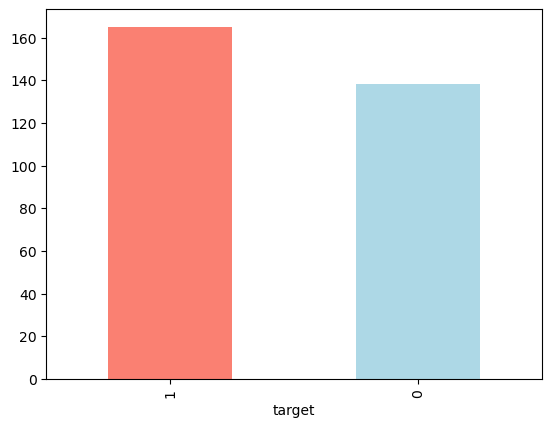

In [6]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# Checking for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Heart Disease Frequency according to Sex attribute

In [10]:
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
# Compare target colujmn with the sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


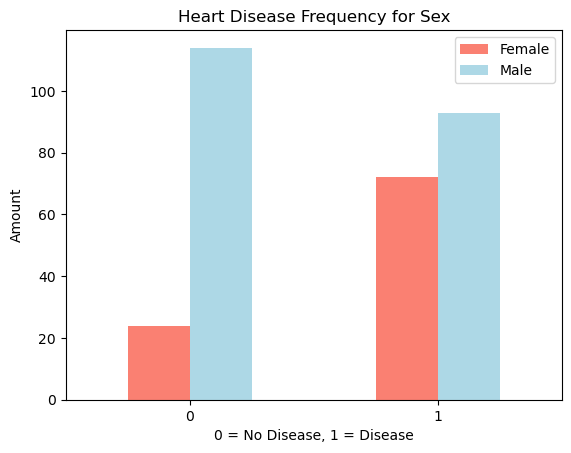

In [12]:
pd.crosstab(df.target,df.sex).plot(kind="bar",color=["salmon","lightblue"]);
plt.title("Heart Disease Frequency for Sex");
plt.xlabel("0 = No Disease, 1 = Disease");
plt.ylabel("Amount");
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

#### from the plot we can infer that, if suspect is a woman then then she is more likely to have a heart disease. Whereas, it is less likely for men

### Age vs Max Heart Rate for Heart Disease

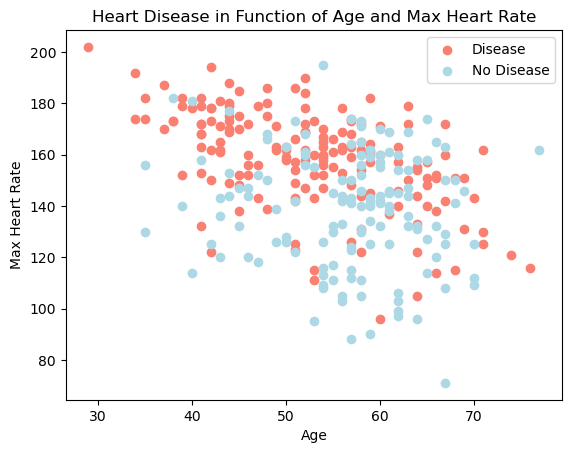

In [13]:
# Create another figure 
plt.figure()

# Scatter with Positive Plots (having heart disease)
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="salmon");

# Scattoer with Negative Plots (having no heart disease)
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="lightblue");

# Adding some important info
plt.title("Heart Disease in Function of Age and Max Heart Rate");
plt.xlabel("Age");
plt.ylabel("Max Heart Rate");
plt.legend(["Disease","No Disease"]);


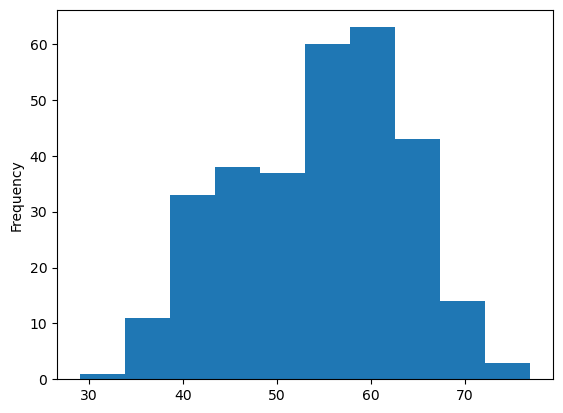

In [14]:
# Check the distribution of the Age attribute
df.age.plot.hist();

#### Let's compare Chest Pain attribute to the Heart Disease attribute

In [15]:
pd.crosstab(df["cp"],df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


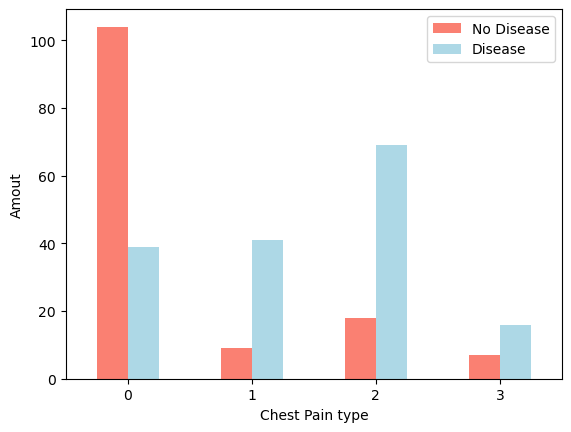

In [16]:
# Making things visual to get more info
pd.crosstab(df["cp"],df["target"]).plot(kind="bar", color=["salmon","lightblue"]);
plt.xlabel("Chest Pain type");
plt.ylabel("Amout");
plt.legend(["No Disease","Disease"]);
plt.xticks(rotation=0);

####  Comparing all the columns with each other i.e correlation matrix

In [17]:
# make correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


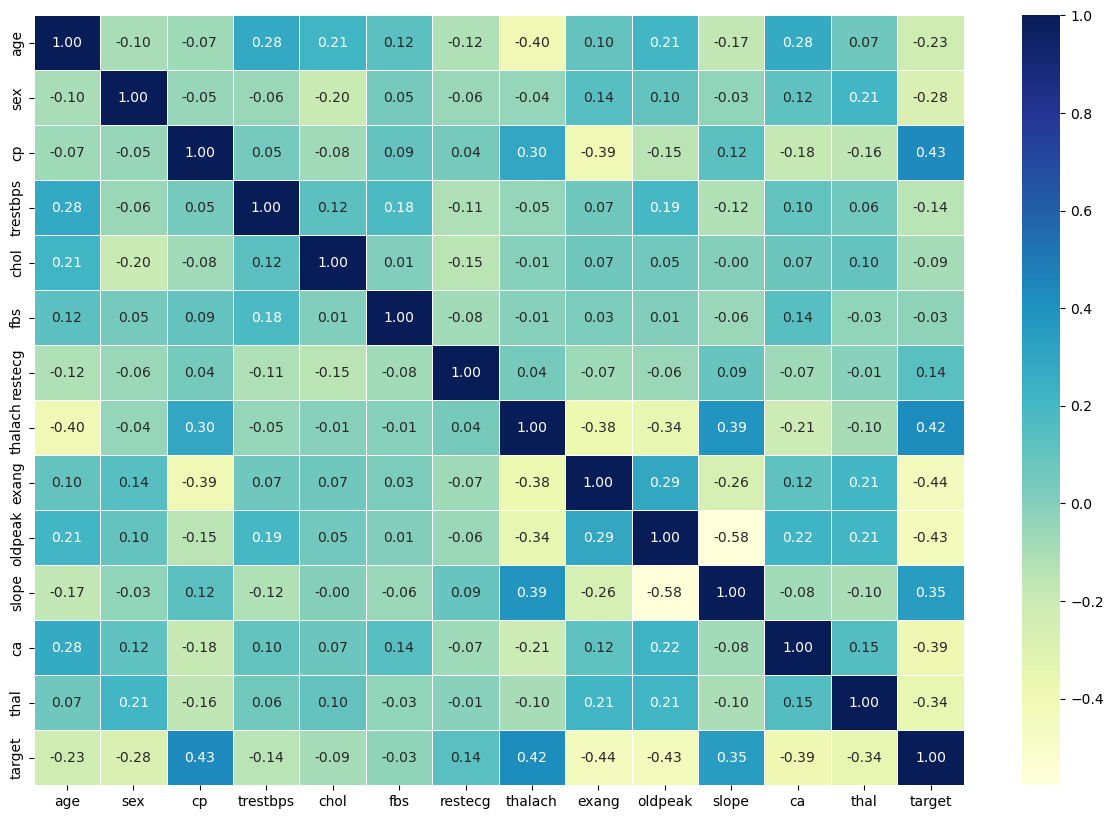

In [18]:
# Plotting the coprrelation matrix using Seabirn heatmap
corr_matrix=df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f",cmap="YlGnBu");

#### This shows how each column is related to the other column using numbers.
* If the number is 1.00, it is a perfect match
* If the number is a positive number, The two columns(attributes) are directly proportional.
* If the number is a negative number, The two colujmns(attributes) are inversly proportional.

In [19]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
X=df.drop("target",axis=1)
y=df["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

Now we have got our data split into train and test sets, it's time to build a machine learning model.
We will train it (find the patterns) on the training set.
And we will test it (use the patterns) on the test_set

We are goinf to try three different machine learning model:
1. Logistic Regression
2. K-Nearest Neighbour
3. Radom Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Making a function to which will test and scores all the avilable models
models={"LogisticRegression":LogisticRegression(), "KNN":KNeighborsClassifier(), "RadomforestClassifier":RandomForestClassifier()}
def fit_and_train(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates the given machine learning model
    models: a dict of different Scikit-learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """

    # Set random seed
    np.random.seed(42)

    # Make a dictionary to keep the test results
    model_scores={}
    for name,model in models.items():
        # Fit the model with the data
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [21]:
model_scores=fit_and_train(models,X_train,X_test,y_train,y_test)
model_scores

D:\Machine_Learning\Sample_Project\Project_1\myapp\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RadomforestClassifier': 0.8360655737704918}

### Model Coparision

<Axes: >

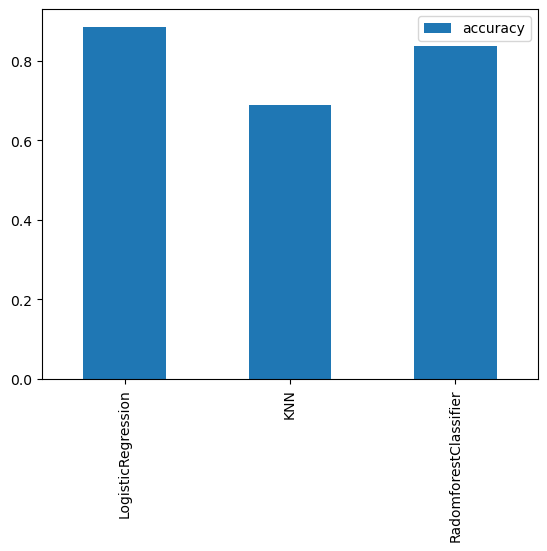

In [22]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar()

Now we have got our baseline model... and we know a model's first predictions are not always what we should based our next steps off. What should we do?

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* precision
* Recall
* F1 score
* Classification report
* ROC Curve
* Area under curve (AUC)

### Hyperparameter Tuning by Hand

In [23]:
# Let's tune KNN
train_scores=[]
test_scores=[]

np.random.seed(42)

# setup KNN instance
knn=KNeighborsClassifier()

# Setting the neighbors range
neighbors=range(1,21)

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update train scores list
    train_scores.append(knn.score(X_train,y_train))

    # Update test scores list
    test_scores.append(knn.score(X_test,y_test))

In [24]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [25]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


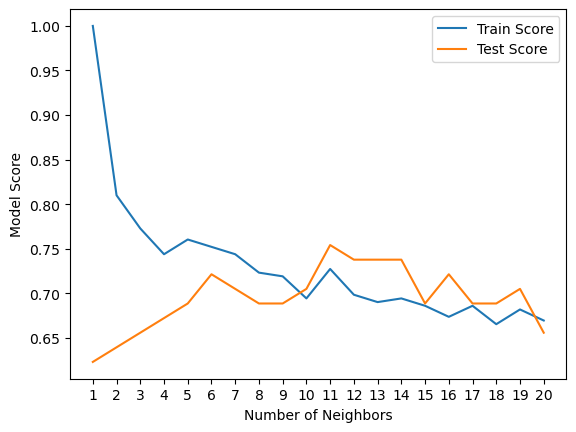

In [26]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xlabel("Number of Neighbors")
plt.xticks(np.arange(1,21))
plt.ylabel("Model Score")
plt.legend()
print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## HyperParameters tuning with RandomizedSearchCV
We are going to tune:
* LogisticRegression()
* RandomForestClassifier()
...using RamndomizedSearchCV

In [33]:
# Create HyperParameter grid for LogisticRegression
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}

# Create a Hyperparameter grid for RandomForestClassifier
rf_grid={"n_estimators": np.arange(10,1000,50),
         "max_depth":[None, 3,5,10],
         "min_samples_split": np.arange(2,20,2),
         "min_samples_leaf": np.arange(1,20,2)}

 Now we have got hyperparameter grid setup for each of our models, let's tune them using RandomizedSearchCV..

In [31]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,verbose=True,n_iter=20)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [32]:
rs_log_reg.best_params_


{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [30]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [34]:
# Tune RandomForestClassifier

np.random.seed(42)

# sEtup random hyperparameter search for randomforestclassifier
rs_rf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,n_iter=20,cv=5,verbose=True)

# Fit the model
rs_rf.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [None, 3, ...], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), 'min_samples_split': array([ 2, 4..., 14, 16, 18]), 'n_estimators': array([ 10, ...60, 910, 960])}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [35]:
# Find the best Parameters
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [36]:
# Evaluate the randomised search RadnomForestClassifier
rs_rf.score(X_test,y_test)

0.8688524590163934

## Hyper Parameters tuning using GridSearchCV
since, logisticRegressionModel produces the best scores so far so, we are gonna improve our logisticRegression model

In [37]:
# Different Parameter for LogisticRegression model
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [38]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluating our tuned machine learing classifier, beyond accuracy
* ROC curve and AUC score
* Confusion Matrix
* Classification report
* Precision
* Recall
* F1-score
...and it would be great if cross-validation was used where possible.

In [42]:
# Plot ROC curve and calculate AUC metric
roc_curve(gs_log_reg,X_test,y_test)

TypeError: too many positional arguments

In [48]:
y_preds=gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [45]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [49]:
# confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


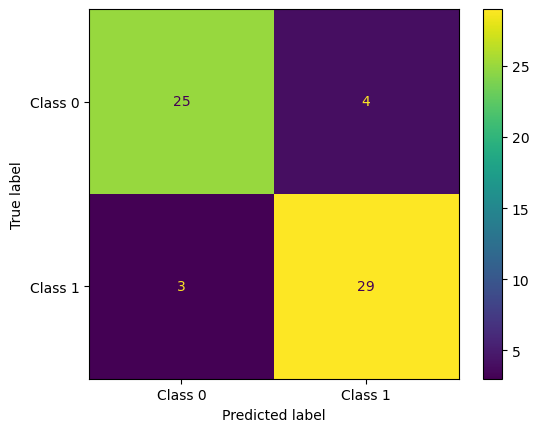

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay
disp_cnfmat=ConfusionMatrixDisplay(confusion_matrix(y_test,y_preds),display_labels=["Class 0","Class 1"])
disp_cnfmat.plot()
plt.show()

Now we have got a ROC curve, an AUC metric and a cinfusion metrix, let's get a classification report as well as cross-validated presion, recall and f1-score.

In [52]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation
We are going to calculate accuracy, precision, recall, f1-score of our model using cross-validation and to do so we will be using `cross_val_score`

In [54]:
# Checking the best params
gs_log_reg.best_params_

{'C': np.float64(0.23357214690901212), 'solver': 'liblinear'}

In [55]:
# Create a new classifier with best parameters
clf=LogisticRegression(C=0.23357214690901212,solver="liblinear")

In [56]:
# cross-validated accuracy
cv_acc=cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc

np.float64(0.8479781420765027)

In [57]:
# cross-validated precision
cv_precision=cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

np.float64(0.8215873015873015)

In [58]:
# cross-validated recall
cv_recall=cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

np.float64(0.9272727272727274)

In [59]:
# cross-validated f1-score
cv_f1=cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

np.float64(0.8705403543192143)

In [62]:
# visualise cross-validation metrics
cv_metrics=pd.DataFrame({"Accuracy":cv_acc, "Precision":cv_precision, "Recall":cv_recall, "f1-score":cv_f1},index=[0])
cv_metrics

,Accuracy,Precision,Recall,f1-score
0,0.847978,0.821587,0.927273,0.87054


<Axes: title={'center': 'Cross-Validation-metrics'}>

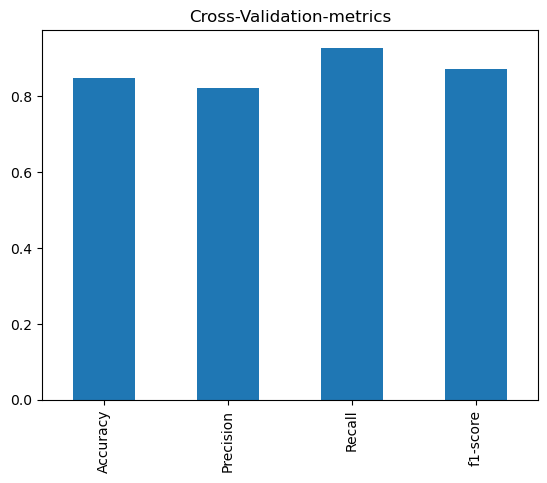

In [64]:
cv_metrics.T.plot.bar(title="Cross-Validation-metrics",legend=False)

## Feature Importance
Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find fearture importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model

In [65]:
gs_log_reg.best_params_

{'C': np.float64(0.23357214690901212), 'solver': 'liblinear'}

In [67]:
# fit the logistic regression model
clf=LogisticRegression(C=0.23357214690901212,solver='liblinear')
clf.fit(X_train,y_train);

In [70]:
# Check coef
# this attribute helps to find out how each attibute of the data is contributing to the for the model evaluation.
clf.coef_

array([[ 0.00369922, -0.90424098,  0.67472823, -0.0116134 , -0.00170364,
         0.04787687,  0.33490208,  0.02472938, -0.63120414, -0.57590996,
         0.47095166, -0.65165344, -0.69984217]])

In [71]:
# match coef's of feature columns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.003699223396114675),
 'sex': np.float64(-0.9042409779785583),
 'cp': np.float64(0.6747282348693419),
 'trestbps': np.float64(-0.011613398123390507),
 'chol': np.float64(-0.0017036431858934173),
 'fbs': np.float64(0.0478768694057663),
 'restecg': np.float64(0.33490207838133623),
 'thalach': np.float64(0.024729380915946855),
 'exang': np.float64(-0.6312041363430085),
 'oldpeak': np.float64(-0.5759099636629296),
 'slope': np.float64(0.47095166489539353),
 'ca': np.float64(-0.6516534354909507),
 'thal': np.float64(-0.6998421698316164)}

<Axes: title={'center': 'Feature Importance'}>

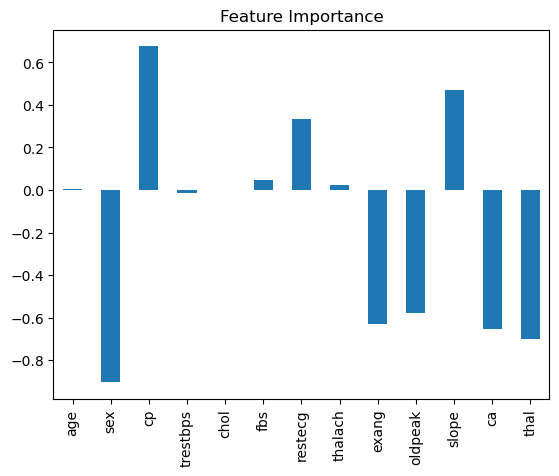

In [72]:
# Visualise important features
feature_df=pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False)